<a href="https://colab.research.google.com/github/XuanLTK/Python_FinalProject/blob/main/%5BPython%5D_Retail_Industry_Customer_Segmentation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Part 1: Load dataset**

Đã làm 1 bước tách từng sheet trong file excell thành 2 file csv, rồi sau đó upload lên github để sử dụng trên google colab

Đã sử dụng đoạn code sau để tách
```
#
import pandas as pd
import numpy as np
ecommerce_retail = pd.read_excel("/Users/xl/Documents/Python_Project3/ecommerce_retail.xlsx", sheet_name="ecommerce retail")
segmentation = pd.read_excel("/Users/xl/Documents/Python_Project3/ecommerce_retail.xlsx", sheet_name="Segmentation")
#df to csv
ecommerce_retail.to_csv("ecommerce_retail.csv", index = False, encoding='utf-8')
segmentation.to_csv("segmentation.csv", index = False, encoding='utf-8')
print(ecommerce_retail.head())
print(segmentation.head())
```



In [ ]:
#LOAD DATASET
import pandas as pd
import numpy as np
ecommerce_retail = pd.read_csv("https://raw.githubusercontent.com/Yeomsojali/Python_FinalProject/main/ecommerce_retail.csv")
print(ecommerce_retail.head())

segmentation = pd.read_csv("https://raw.githubusercontent.com/Yeomsojali/Python_FinalProject/main/segmentation.csv")
print(segmentation.head())

  InvoiceNo  ...
0  536365    ...
1  536365    ...
2  536365    ...
3  536365    ...
4  536365    ...

[5 rows x 8 columns]
              Segment  ...
0  Champions           ...
1  Loyal               ...
2  Potential Loyalist  ...
3  New Customers       ...
4  Promising           ...

[5 rows x 2 columns]


# **Part 2: EDA & Cleaning Dataset**

**sheet: ecommerce_detail**



In [ ]:
print(ecommerce_retail.info())
print(ecommerce_retail.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
            Quantity  ...
count  541909.000000  ...
mean   9.552250       ...
std    218.081158     ...
min   -80995.000000   ...
25%    1.000000       ...
50%    3.000000       ...
75%    10.000000      ...
max    80995.000000   ...

[8 rows x 3 columns]


In [ ]:
print("Data Quality Insights:")
print("Missing values:", ecommerce_retail.isnull().sum())
print("\nNumber of duplicate rows:", ecommerce_retail.duplicated().sum())
print("\nData types of columns:")
print(ecommerce_retail.dtypes)

Data Quality Insights:
Missing values: InvoiceNo      0     
StockCode      0     
Description    1454  
Quantity       0     
InvoiceDate    0     
UnitPrice      0     
CustomerID     135080
Country        0     
dtype: int64

Number of duplicate rows: 5268

Data types of columns:
InvoiceNo      object 
StockCode      object 
Description    object 
Quantity       int64  
InvoiceDate    object 
UnitPrice      float64
CustomerID     float64
Country        object 
dtype: object


Nhận xét: dataset có 8 cột

- cột InvoiceDate chưa đúng format ngày tháng => đổi định dạng datatype sang datetime
- cột CustomerID nên để dạng số nguyên hơn là dạng số thập phân => đổi sang int
- cột Description, Country nên đổi sang dạng string => đổi sang str

- Nhận thấy 2 cột có missing value là Description và CustomerID
  + Description ko mấy ảnh hưởng đến sự tính toán nên => mình sẽ thay thế bằng NaN
  + số lượng missing value của CustomerID khá lớn (135080/541909) chiếm gần 25% trên tổng data => nên mình sẽ ko loại bỏ những giá trị này mà sẽ thay thế bằng NaN
  
- Quantity và UnitPrice có chứa giá trị âm => không hợp lí nên mình sẽ loại bỏ
- có duplicate => loại bỏ duplicate rows


**Cleaning Data of ecommerce_detail**

In [ ]:
#Replacing null values with NA
ecommerce_retail['CustomerID'].replace(np.nan, inplace=True)
ecommerce_retail['Description'].replace(np.nan, inplace=True)
print("Missing values:", ecommerce_retail.isnull().sum())

#Correct the wrong datatype
#datetime
ecommerce_retail['InvoiceDate'] = pd.to_datetime(ecommerce_retail['InvoiceDate'])
print(ecommerce_retail['InvoiceDate'].dtype)
#customerid to int
ecommerce_retail['CustomerID'] = ecommerce_retail['CustomerID'].astype(int)
print(ecommerce_retail['CustomerID'].dtype)
#description to string
ecommerce_retail['Description'] = ecommerce_retail['Description'].astype(str)
print(ecommerce_retail['Description'].dtype)

#drop duplicate
ecommerce_retail.drop_duplicates(inplace=True)
print("\nNumber of duplicate rows:", ecommerce_retail.duplicated().sum())

#drop negative values
ecommerce_retail = ecommerce_retail[(ecommerce_retail['Quantity'] > 0) & (ecommerce_retail['UnitPrice'] > 0)]
print(ecommerce_retail.describe())

Missing values: InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
datetime64[ns]
int64
object

Number of duplicate rows: 0
            Quantity  ...
count  524878.000000  ...
mean   10.616600      ...
min    1.000000       ...
25%    1.000000       ...
50%    4.000000       ...
75%    11.000000      ...
max    80995.000000   ...
std    156.280031     ...

[8 rows x 4 columns]


In [ ]:
print(ecommerce_retail.info())

<class 'pandas.core.frame.DataFrame'>
Index: 524878 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524878 non-null  object        
 1   StockCode    524878 non-null  object        
 2   Description  524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   InvoiceDate  524878 non-null  datetime64[ns]
 5   UnitPrice    524878 non-null  float64       
 6   CustomerID   524878 non-null  int64         
 7   Country      524878 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 36.0+ MB
None


ecommerce_retail đã được clean


**sheet: Segmentation**

In [ ]:
segmentation.info()
segmentation.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Segment    11 non-null     object
 1   RFM Score  11 non-null     object
dtypes: object(2)
memory usage: 304.0+ bytes


,Segment,...
count,11,...
unique,11,...
top,Champions,...
freq,1,...


Nhận xét: No mising value, no duplucate, correct type => không cần clean gì hết

# **Part 3: RFM model**

**Create the RFM table**

In [ ]:
#count total sale
ecommerce_retail['TotalSale']= ecommerce_retail['Quantity']*ecommerce_retail['UnitPrice']

#set the rencent date
now = pd.to_datetime('2011-12-31')

#Groupby customer
customer_group = ecommerce_retail.groupby('CustomerID').agg({'InvoiceDate': lambda x: (now - x.max()).days,
                                                         'InvoiceNo': 'nunique',
                                                         'TotalSale': 'sum'}).sort_values('TotalSale',ascending=False).reset_index()
#rename column
customer_group.rename(columns={'InvoiceDate': 'Recency',
                               'InvoiceNo': 'Frequency',
                               'TotalSale': 'Monetary'}, inplace=True)
print(customer_group.info())
print(customer_group.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4344 non-null   int64  
 1   Recency     4344 non-null   int64  
 2   Frequency   4344 non-null   int64  
 3   Monetary    4344 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 135.9 KB
None
   CustomerID  ...
0  14646       ...
1  18102       ...
2  17450       ...
3  16446       ...
4  14911       ...

[5 rows x 4 columns]


**Check validation**

In [ ]:
#check the validation of customer_group
customer12348 = ecommerce_retail[ecommerce_retail['CustomerID'] == 12348]

check_recency = (now - customer12348['InvoiceDate'].max()).days == 96
check_frequency = customer12348['InvoiceNo'].nunique() == 5
check_monetary = round(customer12348['TotalSale'].sum(),2) == 3366.27

print(customer12348, check_recency, check_frequency, check_monetary)
print(customer12348['InvoiceNo'].value_counts())

       InvoiceNo  ...
34083   539318    ...
34084   539318    ...
34085   539318    ...
34086   539318    ...
34087   539318    ...
...        ...    ...
146016  548955    ...
146017  548955    ...
359058  568172    ...
359059  568172    ...
359060  568172    ...

[206 rows x 9 columns] True True True
InvoiceNo
541999    175
539318    17 
541998    6  
548955    5  
568172    3  
Name: count, dtype: int64


Nhận xét: phần groupby trên đã tính đúng

In [ ]:
# Calculate RFM_score
RFM_table = customer_group
RFM_table['R_score'] = pd.cut(RFM_table['Recency'].rank(pct=True), bins=5, labels=range(5, 0, -1))
RFM_table['F_score'] = pd.cut(RFM_table['Frequency'].rank(pct=True), bins=5, labels=range(1, 6))
RFM_table['M_score'] = pd.cut(RFM_table['Monetary'].rank(pct=True), bins=5, labels=range(1, 6))

#RFM_score
RFM_table['RFM_score'] = RFM_table['R_score'].astype(str) + RFM_table['F_score'].astype(str) + RFM_table['M_score'].astype(str)
RFM_table['RFM_score'] = RFM_table['RFM_score'].astype(int)
RFM_table.head(10)

,CustomerID,...
0,14646,...
1,18102,...
2,17450,...
3,16446,...
4,14911,...
5,14156,...
6,12415,...
7,17511,...
8,16029,...
9,12346,...


Đã tạo xong bảng điểm RFM cho từng Khách hàng.
Để tổng hợp thành các phân khúc thì cần mapping RFM_table với dữ liệu phân loại phân khúc khách hàng là segmentation (đã cho ở đề bài)

In [ ]:
# Explode the 'RFM Score' column to create separate rows for each score
segmentation['RFM Score'] = segmentation['RFM Score'].str.split(',')
segmentation = segmentation.explode('RFM Score').reset_index(drop=True)

# Convert the 'RFM Score' column back to integers
segmentation['RFM Score'] = segmentation['RFM Score'].astype(int)

segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Segment    125 non-null    object
 1   RFM Score  125 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


In [ ]:
# Merge based on RFM_score and RFM Score columns to get the corresponding Segment
merged_seg = RFM_table.merge(segmentation, left_on='RFM_score', right_on='RFM Score', how='left')
merged_seg.drop(columns=['RFM Score'], inplace=True)

print(merged_seg.head(10))
print(merged_seg.describe())

   CustomerID  ...
0  14646       ...
1  18102       ...
2  17450       ...
3  16446       ...
4  14911       ...
5  14156       ...
6  12415       ...
7  17511       ...
8  16029       ...
9  12346       ...

[10 rows x 9 columns]
         CustomerID  ...
count  4344.000000   ...
mean   15299.816989  ...
std    1722.095010   ...
min    12346.000000  ...
25%    13811.750000  ...
50%    15299.500000  ...
75%    16779.250000  ...
max    18287.000000  ...

[8 rows x 5 columns]


Bảng merged_seg đã được nối phân khúc thành công.
Phòng ban Marketing có thể áp dụng bảng này để có thể triển khai chiến dịch marketing trong dịp marketing đến từng khách hàng cụ thể.
Tuy nhiên, để đề xuất được các hoạt động hoặc chiến dịch cho từng phân khúc thì chúng ta sẽ tiếp tục phân tích sâu hơn.

=> Cần tổng hợp xem số lượng Khách hàng trong từng phân khúc khách hàng như thế nào, đặc điểm của họ ra sao, nhóm khách hàng nào cần marketing tập trung quan tâm nhất


In [ ]:
# Group RFM_model by each Segment
seg_group = merged_seg.groupby('Segment').agg(Cus_count=('CustomerID','count'),
                                              avg_Recency=('Recency','mean'),
                                              avg_Frequency=('Frequency','mean'),
                                              sum_Monetary=('Monetary','sum')).round(1).reset_index()

seg_group['Cus_count_share'] = (seg_group['Cus_count']*100/(seg_group['Cus_count'].sum())).round(2)
seg_group['Monetary_share'] = (seg_group['sum_Monetary']*100/seg_group['sum_Monetary'].sum()).round(2)

seg_group.sort_values(by='Cus_count', ascending=False, inplace=True)
seg_group

,Segment,...
3,Champions,...
4,Hibernating customers,...
5,Lost customers,...
6,Loyal,...
8,New Customers,...
1,At Risk,...
9,Potential Loyalist,...
0,About To Sleep,...
7,Need Attention,...
10,Promising,...


Ở đây ta có thể dễ dàng thấy được số lượng của từng phân khúc khách hàng là bao nhiêu, trung bình các giá trị RFM và tỉ lệ phân bổ ở từng phân khúc khách hàng. Nhưng để có cái nhìn nhanh và tổng quát hơn thì biểu đồ dưới đây sẽ thể hiện được rõ ràng hơn.

# **Part4: Visualization & Insights**






In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

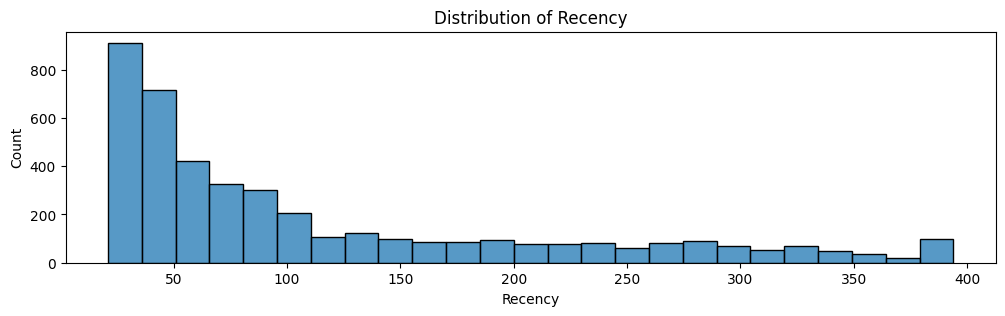

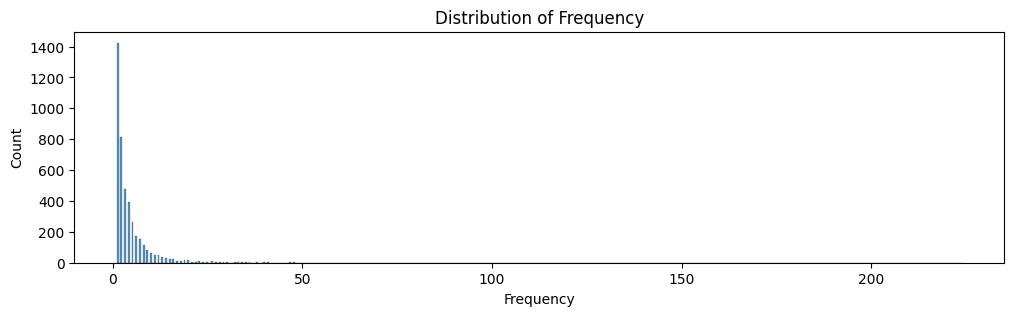

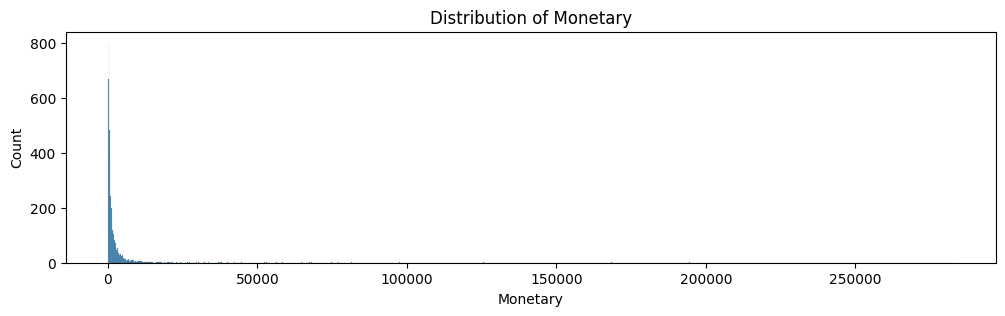

In [ ]:
#show distribution of each segment with RFM model
column_names = ['Recency', 'Frequency', 'Monetary']
for col in column_names:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.histplot(merged_seg[col])
    ax.set_title(f'Distribution of {col}')
    plt.show()

Nhận xét:

1.   Đối với giá trị Recency - thời gian từ lần mua hàng gần nhất của khách hàng đến hiện tại (31/12/2011):
- Từ biểu đồ phân bổ trên ta có thể thấy được là biểu đồ được phân bổ khá đều, trải dài từ khoảng 20 đến gần 400 ngày. Số ngày càng lớn thì khả năng khách hàng đó quay trở lại mua hàng càng thấp.
- Phần lớn Khách hàng mới mua hàng chỉ khoảng từ 3 tháng đổ lại, nên các chiến dịch để thu hút họ mua hàng như gỉam giá hoặc tri ân khách hàng thân thiết sẽ tăng khả năng thành công có đơn hàng mới từ nhóm khách hàng có điểm Rencency thấp.

2.   Đối với giá trị Frequency - tần suất mua hàng, cụ thể tổng số đơn hàng mà khách hàng đã mua.
- Qua biểu đồ có thể thấy, phần lớn số lượng đơn hàng ít hơn 50 đơn hàng, và chỉ có một vài khách hàng có số lượng đơn lớn hơn 50.
=> Phần đông khách hàng của công ty là các người mua nhỏ lẻ, cá nhân hơn là các cửa hàng bán lẻ/đối tác
- Do vậy, có thể áp dụng các hình thức quảng bá đại chúng như quảng cáo, banner,...để quáng bá rộng khắp và đại đa số có nơi tệp khách hàng của công ty


3.   Đối với giá trị Monetary - Tổng số tiền mà khách hàng đó đã mua hàng
- Tổng số tiền mà khách hàng đã bỏ ra để mua hàng của công ty phần đông chưa tới 20000usd
- Có một số ít khách hàng đã chi nhiều hơn, lên đến hơn 250000usd => cần thiết có sự chọn lọc để quan tâm kỹ hơn những khách hàng đơn hàng có giá trị cao mang lại doanh thu cao cho công ty.






In [ ]:
!pip install squarify -qqq
import squarify

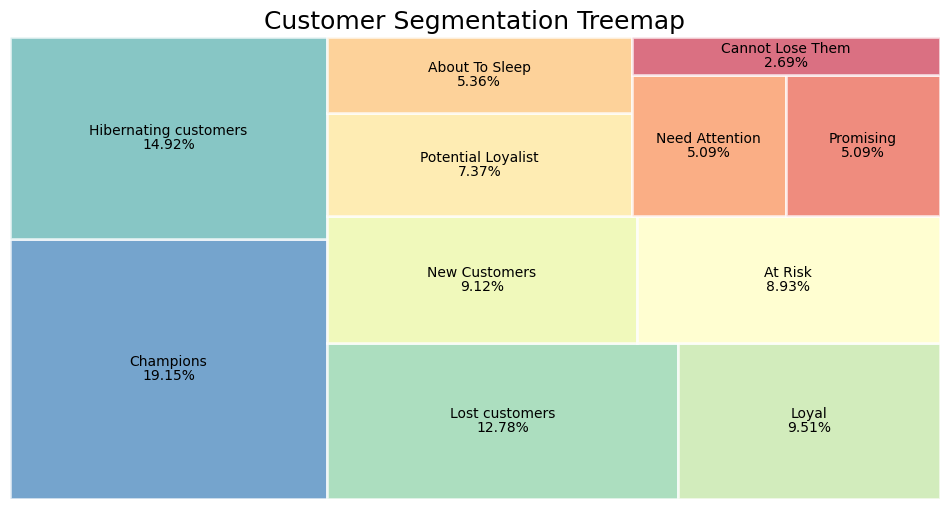

In [ ]:
#Treemap of Customer segment share
colors1= sns.color_palette('Spectral_r',11)
fig, ax = plt.subplots(figsize=(12,6))

squarify.plot(sizes=seg_group['Cus_count'],
              label=seg_group['Segment'],
              value=[f'{x}%' for x in seg_group['Cus_count_share']],
              alpha=.7,
              color=colors1,
              bar_kwargs=dict(linewidth=2, edgecolor="white")
              )
plt.title('Customer Segmentation Treemap', fontsize=18)
plt.axis('off')
plt.show()

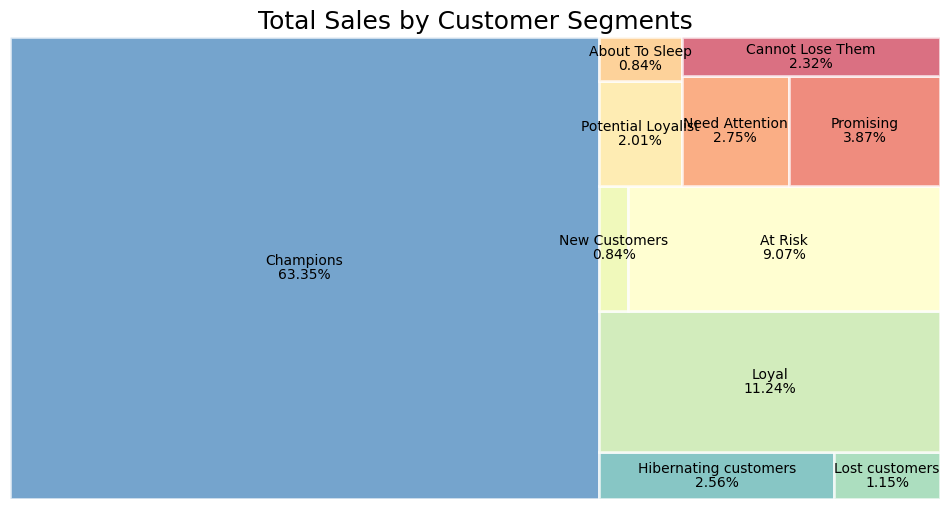

In [ ]:
#Tree map of Total Sale each segment
colors1= sns.color_palette('Spectral_r',11)
fig, ax = plt.subplots(1, figsize = (12,6))

squarify.plot(sizes=seg_group['Monetary_share'],
              label=seg_group['Segment'],
              value=[f'{x}%' for x in seg_group['Monetary_share']],
              alpha=.7,
              color=colors1,
              bar_kwargs=dict(linewidth=2, edgecolor="white")
             )
plt.title('Total Sales by Customer Segments', fontsize=18)
plt.axis('off')
plt.show()

Nhận xét:
- Nhóm Champions chiếm khoảng 19% trên tổng tập khách hàng nhưng lại chiếm hơn 1 nửa tổng doanh thu của công ty.
- Nhóm đứng thứ 2 và 3 về số lượng khách hàng là Hibernating và Lost customers nhưng doanh thu không mang lại bao nhiêu, chỉ chiếm lần lượt khoảng 3% và 1% trên tổng doanh thu.
- 2 Nhóm loyal và At risk thì ngược lại, tuy số lượng ít hơn Hibernating và Lost customers 1 chút, nhưng lại chiếm doanh thu tổng 2 nhóm khoảng 20%, cao hơn nhiều lần 2 nhóm trên.
- Các nhóm khách hàng còn lại vừa có số lượng khách hàng không nhiều, mà cũng không mang lại doanh thu cao.

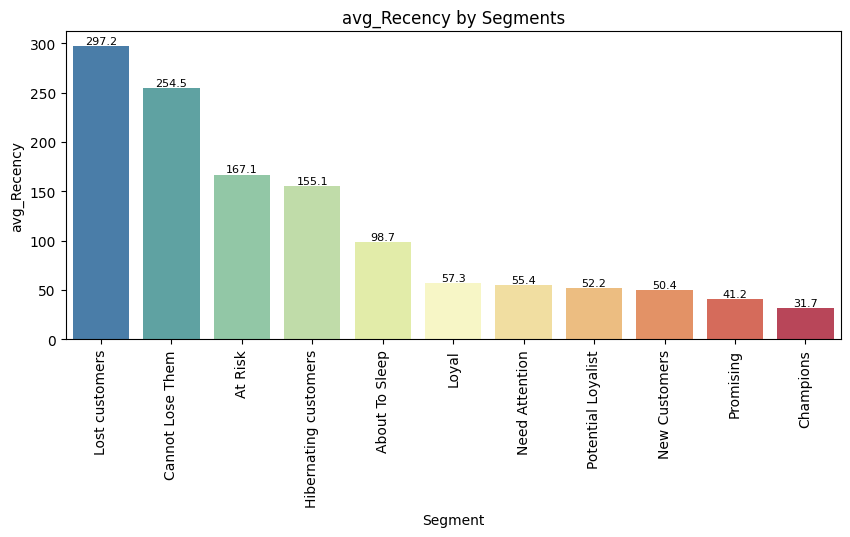

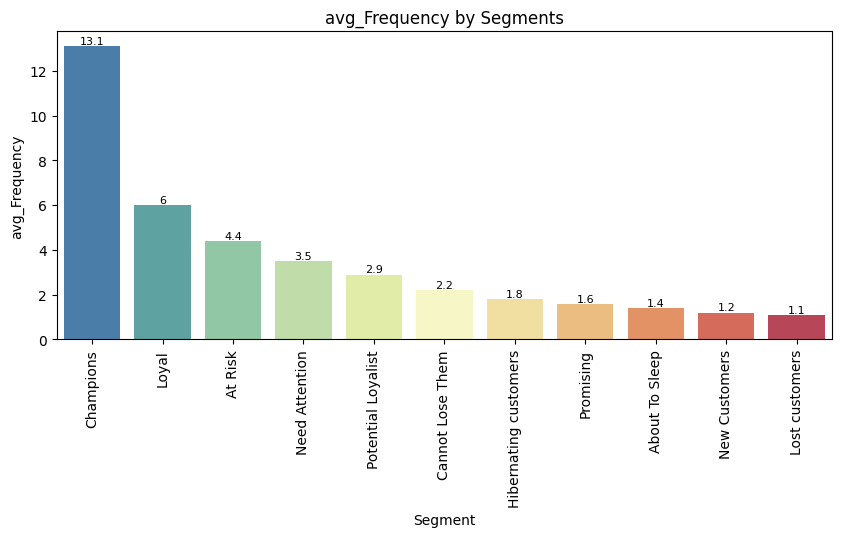

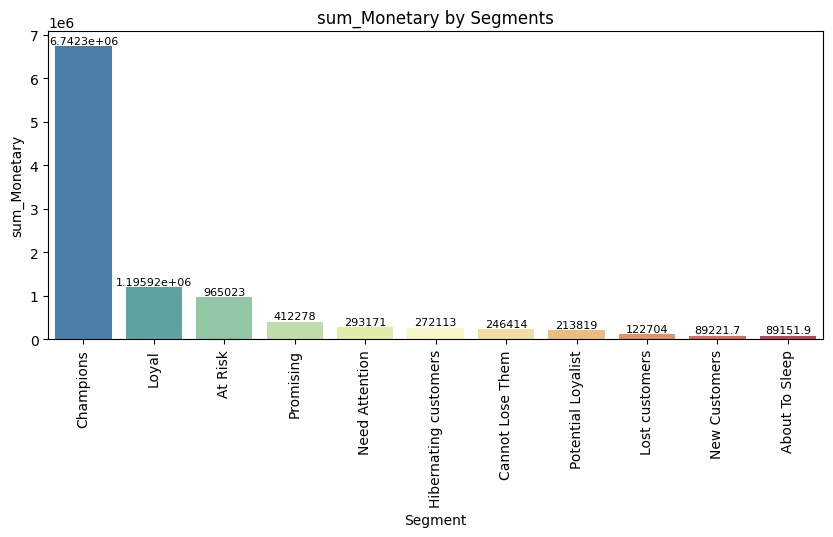

In [ ]:
# Mean of each RFM value by Segments
column_names=['avg_Recency', 'avg_Frequency', 'sum_Monetary']
for col in column_names:
    fig, ax = plt.subplots(figsize = (10,4))
    graph = sns.barplot(x='Segment',
                        y=col,
                        data=seg_group.sort_values(col, ascending=False),
                        hue='Segment',
                        palette=colors1,
                        legend= False,
                        )
    for i in graph.containers:
      ax.bar_label(i,fontsize=8)
    graph.set_title(f'{col} by Segments')
    graph.set(xlabel='Segment')
    plt.xticks(rotation=90)
    plt.show()

Nhận xét: Theo thứ tự lần lượt từ biểu đồ treemap đến từng giá trị trung bình RFM ở mỗi phân khúc thì có thể rút ra một số insights và recomment sau:

- Từ Customer Segmentation Treemap ta có thể thấy được 2 nhóm khách hàng là Champions và Hibernating Customers chiếm phân lớn số lượng khách hàng, với gần 35%
- Bên cạnh đó các nhóm khách hàng Loyal, New customer, Potential_Loyalist và At risk cũng tiềm năng, chiếm tổng phân trăm trên 20%
- Nhóm khách hàng Lost customers chiếm khá lớn (gần 13%) cũng cần xem xét thu
hút lại


Sau đây là bảng xếp hạng các phân khúc, đặc điểm của phân khúc đó và những đề xuất hành động:



In [ ]:
Segment = ['Champions', 'Hibernating Customers', 'Lost customers','Loyal', 'New Customers', 'At risk','Potential Loyalist', 'About To Sleep', 'Promising', 'Need Attention', 'Cannot Lose Them']
Characteristic = ['Bought recently, buy often, and spend the most!', 'Last purchase was long back, low spenders and low number of orders.', 'Lowest recency, frequency and monetary scores.','Spend good money with us often. Responsive to promotions.','Bought most recently, but not often.','Spent big money and purchased often. But long time ago. Need to bring them back!','Recent shoppers, but spent a good amount and bought more than once', 'Below average recency, frequency and monetary values. Will lose them if not reactivated.','Recent customers, but haven’t spent much', 'Above average recency, frequency and monetary values. May not have bought very recently though.','Made biggest purchases, and often. But haven’t returned for a long time.']
ActionableTip = ['Reward them. Can be early adopters for new products. Will promote your brand.','Offer other relevant products and special discounts. Recreate brand value.', 'Revive interest with reach out campaign, ignore otherwise.','Upsell higher-value products. Ask for reviews. Engage them','Provide onboarding support, give them early success, and start building relationships','Send personalized emails to reconnect, offer renewals, provide helpful resources.' ,'Offer membership/loyalty program, and recommend other products.','Share valuable resources, recommend popular products / renewals at discount, reconnect with them.','Create brand awareness, and offer free trials','Make limited time offers, Recommend based on past purchases. Reactivate them.','Win them back via renewals or newer products, don’t lose them to competition, talk to them.']
actiontip = pd.DataFrame({'Segment': Segment, 'Characteristic': Characteristic, 'ActionableTip': ActionableTip})
actiontip

,Segment,...
0,Champions,...
1,Hibernating Customers,...
2,Lost customers,...
3,Loyal,...
4,New Customers,...
5,At risk,...
6,Potential Loyalist,...
7,About To Sleep,...
8,Promising,...
9,Need Attention,...


Với mô hình bán lẻ của công ty Superstore thì có một số đề xuất như sau:
- Team Marketing nên chú trọng vào chỉ số Recency, cần thực hiện chiến dịch thu hút sự quan tâm và độ nhận diện của thương hiệu đến khách hàng. Ngoài nhóm champions đứng đầu ra, marketing cần chú tâm triển khai chiến dịch tập trung đối tượng khách hàng Hibernating và Lost. 2 nhóm khách hàng này chiếm tỉ trọng lớn thứ 2 và 3 trong tổng số tệp khách hàn và có nguy cơ đánh mất khá cao, có thể gây tổn thất hoặc mất 1 lượng khách hàng lớn.

- Team Sales thì nên quan tâm nhất vào chỉ số cả 2 chỉ số Frequency và Monetary. Cần giữ liên hệ với các khách hàng Loyal, để giới thiệu cho họ những sản phẩm mới nhất một cách nhanh chóng, tạo tiềm năng tăng doanh thu cho công ty. Bên cạnh đó, cũng nên tiếp cận và tạo mối quan hệ với các khách hàng mới (New customers), nhóm At risk và nhóm Potential Loyalist. Các nhóm KH này chiếm tỉ trọng trung bình và có rất nhiều tiềm năng để trở thành khách hàng thân thiết và trung thành của công ty.

